Step 1: Import Required Libraries

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


Step 2: Load the Dataset

In [32]:
data = pd.read_csv('/content/Churn_Modelling.csv')
print("Dataset overview:")
print(data.head())
print("Missing values:")
print(data.isnull().sum())



Dataset overview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63      

Step 3: Inspect the Data

In [19]:
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])  # Dropping non-feature columns
y = data['Exited']


Step 4: Define Features and Target Variable

In [20]:
# Define numeric and categorical features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) #sparse=False for numpy array output, handle_unknown to avoid errors with unseen values during prediction
        ]), categorical_features)
    ]
)


Step 5: Data Preprocessing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 6: Split the Data into Training and Testing Sets

In [22]:
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)


Step 7: Initialize Models

In [23]:
# Logistic Regression Pipeline
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_model)])

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', gb_model)])


Step 8: Create Pipelines for Each Model

In [24]:
# Logistic Regression Pipeline
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_model)])

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', gb_model)])


Step 9: Train and Evaluate Each Model

Logistic Regression

In [25]:
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))



Logistic Regression Results:
Accuracy: 0.8043333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.49      0.14      0.21       584

    accuracy                           0.80      3000
   macro avg       0.66      0.55      0.55      3000
weighted avg       0.76      0.80      0.76      3000



Random Forest

In [26]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.8546666666666667
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2416
           1       0.69      0.45      0.55       584

    accuracy                           0.85      3000
   macro avg       0.79      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



Gradient Boosting

In [27]:
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Results:
Accuracy: 0.8633333333333333
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.44      0.56       584

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.85      3000



Step 10: Display Confusion Matrices

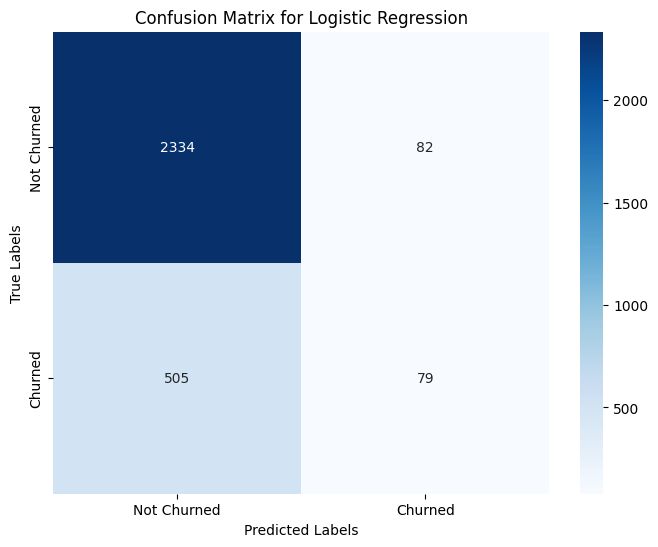

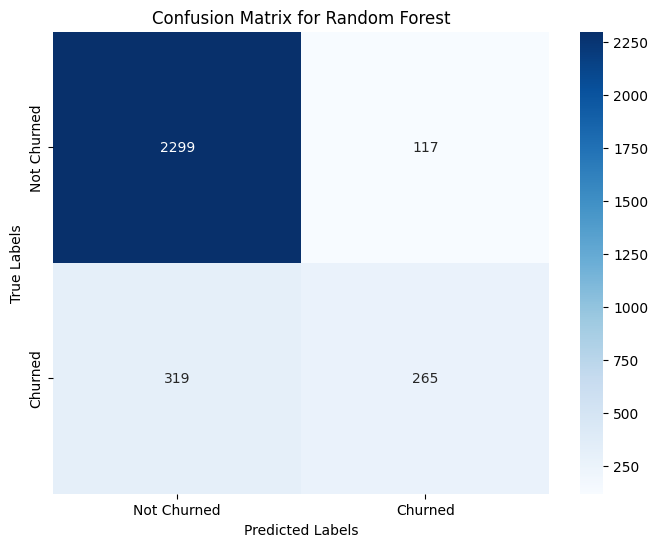

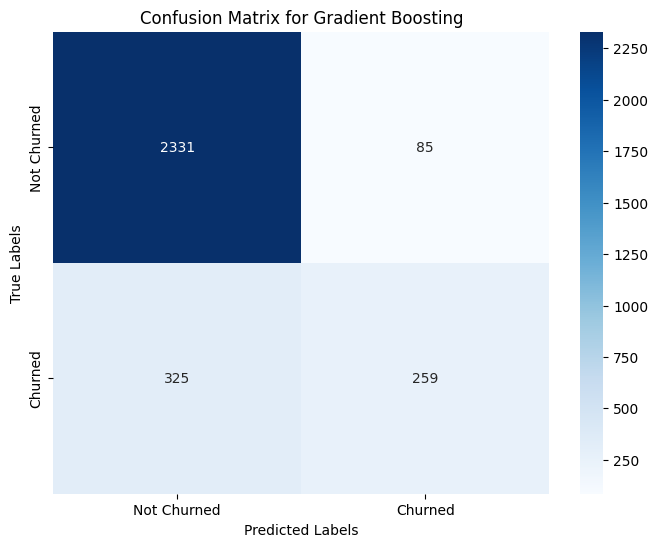

In [40]:


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred_logistic, 'Logistic Regression')

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

# Gradient Boosting
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')
